In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
tf.__version__

'1.15.0'

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py    
import numpy as np 

In [0]:
f=h5py.File('/content/drive/My Drive/CNN PROJECT/SVHN_single_grey1.h5','r')

In [0]:
list(f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
print("Xtrain_shape",f['X_train'].shape, "Xtest_shape",f['X_test'].shape)

Xtrain_shape (42000, 32, 32) Xtest_shape (18000, 32, 32)


In [0]:
print("x_valaidata data",f['X_val'].shape,"y_validation",f['y_val'].shape)

x_valaidata data (60000, 32, 32) y_validation (60000,)


In [0]:
print("ytest data",f['y_test'].shape,"ytrain_data",f['y_train'].shape)

ytest data (18000,) ytrain_data (42000,)


In [0]:
X_train=f['X_train'][:]
X_test=f['X_test'][:]

y_train=f['y_train'][:]
y_test=f['y_test'][:]

X_val=f['X_val'][:]
y_val=f['y_val'][:]

#close the read file 
f.close()

In [0]:
print("Xtrain_shape",X_train.shape, "Xtest_shape",X_test.shape)
print("x_valaidata data",X_val.shape,"y_validation",y_val.shape)
print("ytest data",y_test.shape,"ytrain_data",y_train.shape)

Xtrain_shape (42000, 32, 32) Xtest_shape (18000, 32, 32)
x_valaidata data (60000, 32, 32) y_validation (60000,)
ytest data (18000,) ytrain_data (42000,)


In [0]:
#plotting image to check what type of images are:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, ):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

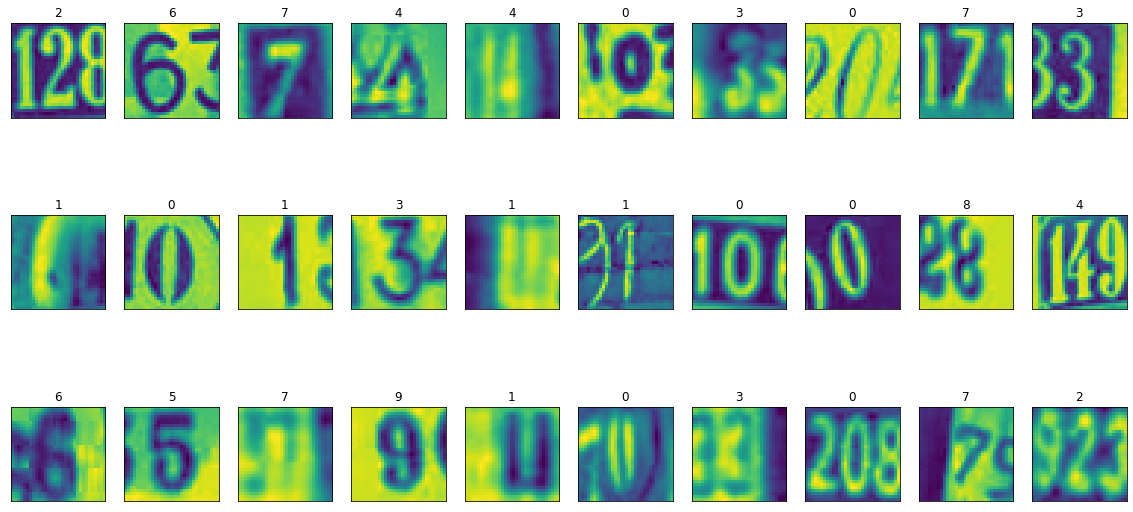

In [0]:
# check some training image in the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plot_images(X_train, y_train, 3,10)

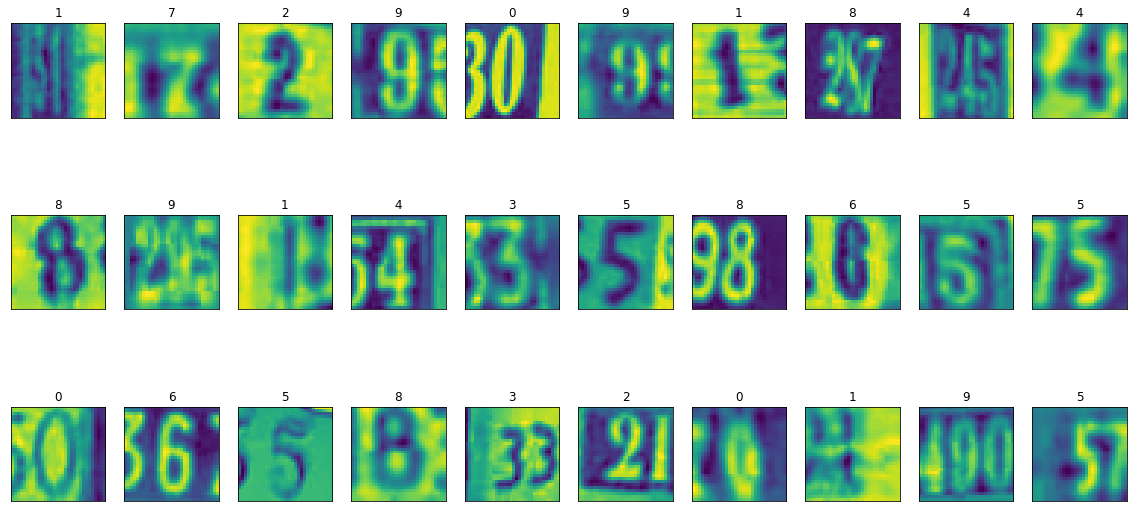

In [0]:
# check some testing image in the data
plot_images(X_test, y_test, 3,10)

In [0]:
X_test[:]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]],

       [[115.1609, 114.161 , 113.1611, ..., 112.0302, 112.6711,
         112.7851],
        [110.5743, 110.2754, 108.9766, ..., 106.1448, 106.7857,
         107.0137],
        [102.8031, 102.5042, 101.7924, ...,  95.776 ,  95.531 ,
          95.645 ],
        ...,
        [169.8457, 170.6176, 167.8028, ...,  45.1708,  55.6967,
          62.81  ],
        [157.7329, 157.6189, 153.8042, ...,  42.9538,  50.1811,
          56.1805],
        [150.3207, 149.2068, 144.8051, ...,  42.

In [0]:
#check unique lables and values in labels in y_train
print(np.unique(y_train))

y_train[0:20]

[0 1 2 3 4 5 6 7 8 9]


array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0, 1, 3, 1, 1, 0, 0, 8, 4],
      dtype=uint8)

In [0]:
#check unique lables and values in labels in y_test
print(np.unique(y_test))

y_test[0:20]

[0 1 2 3 4 5 6 7 8 9]


array([1, 7, 2, 9, 0, 9, 1, 8, 4, 4, 8, 9, 1, 4, 3, 5, 8, 6, 5, 5],
      dtype=uint8)

MODEL BUILDING

In [0]:
tf.keras.backend.clear_session()

In [0]:
from tensorflow.keras.layers import BatchNormalization

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(BatchNormalization())

# 4 Hidden layers and 2 Dropout layer
model.add(tf.keras.layers.Dense(300,  activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(.30))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(.30))
model.add(tf.keras.layers.Dense(50,activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
X_val_arr=np.array(X_val)


In [0]:

model.fit(X_train,y_train,
          validation_data=(X_val_arr,y_val),
          epochs=100,batch_size=100,shuffle='batch')

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 108us/sample - loss: 1.7114 - acc: 0.3945 - val_loss: 1.0942 - val_acc: 0.6499
Epoch 2/100
42000/42000 [==============================] - 4s 97us/sample - loss: 1.1387 - acc: 0.6340 - val_loss: 0.8777 - val_acc: 0.7216
Epoch 3/100
42000/42000 [==============================] - 4s 93us/sample - loss: 0.9799 - acc: 0.6869 - val_loss: 0.7659 - val_acc: 0.7638
Epoch 4/100
42000/42000 [==============================] - 4s 94us/sample - loss: 0.8708 - acc: 0.7251 - val_loss: 0.7001 - val_acc: 0.7810
Epoch 5/100
42000/42000 [==============================] - 4s 94us/sample - loss: 0.7958 - acc: 0.7513 - val_loss: 0.6594 - val_acc: 0.7926
Epoch 6/100
42000/42000 [==============================] - 4s 92us/sample - loss: 0.7426 - acc: 0.7658 - val_loss: 0.5800 - val_acc: 0.8187
Epoch 7/100
42000/42000 [==============================] - 4s 100us/sample - loss: 0.6915 - acc: 0.7827 - val

I achieved 95.45 % accuracy  on training data and 93.61% accuracy on validation data

In [0]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 300)               307500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3

In [0]:
model.evaluate(X_test,y_test,batch_size=100)

18000/18000 [==============================] - 1s 30us/sample - loss: 0.6395 - acc: 0.8632


[0.6395395086871253, 0.8631667]

In [0]:
y_pred=model.predict_classes(X_test)

In [0]:
from sklearn import metrics
class_report=metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1814
           1       0.86      0.87      0.86      1828
           2       0.91      0.87      0.89      1803
           3       0.83      0.82      0.82      1719
           4       0.90      0.89      0.89      1812
           5       0.81      0.88      0.85      1768
           6       0.88      0.84      0.86      1832
           7       0.91      0.88      0.89      1808
           8       0.80      0.85      0.83      1812
           9       0.87      0.83      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



I achieved 86% accuracy on test data 